In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

(32, 32, 3)


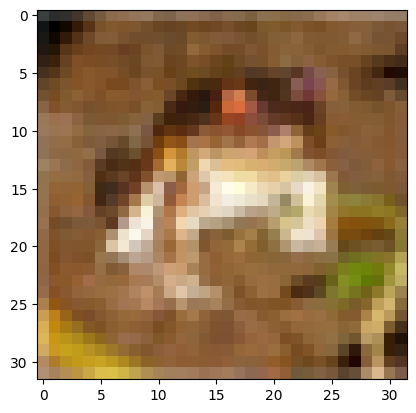

In [6]:
print(x_train[0].shape)
plt.imshow(x_train[0])

In [7]:
x_train.max()

255

In [8]:
x_train = x_train/225
x_test = x_test/255

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [15]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5198 - accuracy: 0.4548 - val_loss: 1.4500 - val_accuracy: 0.4856
Epoch 2/15
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1568 - accuracy: 0.5929 - val_loss: 1.2836 - val_accuracy: 0.5420
Epoch 3/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0063 - accuracy: 0.6520 - val_loss: 1.0312 - val_accuracy: 0.6430
Epoch 4/15
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9017 - accuracy: 0.6912 - val_loss: 1.0865 - val_accuracy: 0.6256
Epoch 5/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8188 - accuracy: 0.7194 - val_loss: 1.0196 - val_accuracy: 0.6683
Epoch 6/15
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7520 - accuracy: 0.7423 - val_loss: 1.0306 - val_accuracy: 0.6635
Epoch 7/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6942 - accuracy: 0.7638 - val_loss: 1.0033 -

In [16]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.519811,0.45480,1.449973,0.4856
1,1.156848,0.59286,1.283570,0.5420
2,1.006342,0.65196,1.031221,0.6430
3,0.901728,0.69120,1.086489,0.6256
4,0.818813,0.71938,1.019589,0.6683


<Axes: >

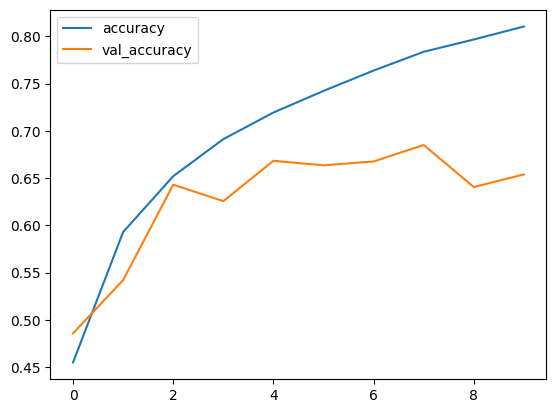

In [17]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

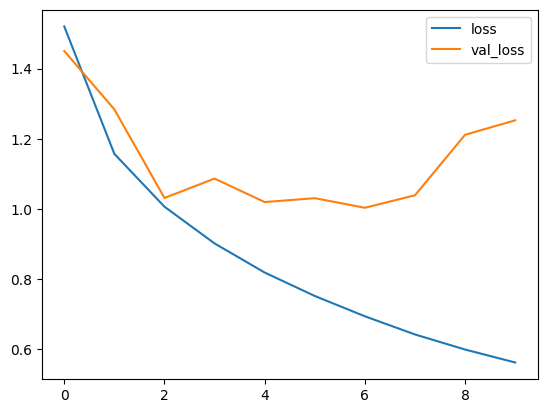

In [18]:
losses[['loss','val_loss']].plot()

In [19]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.2524346113204956, 0.6539000272750854]


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(x_test)
predictions = np.round(y_pred).astype(int)
y_pred_multiclass = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 8ms/step


In [21]:
print(classification_report(y_test,y_pred_multiclass))

              precision    recall  f1-score   support

           0       0.33      0.76      0.46      1000
           1       0.68      0.87      0.76      1000
           2       0.56      0.57      0.56      1000
           3       0.55      0.46      0.50      1000
           4       0.67      0.56      0.61      1000
           5       0.59      0.52      0.55      1000
           6       0.89      0.61      0.73      1000
           7       0.88      0.58      0.70      1000
           8       0.79      0.76      0.77      1000
           9       0.92      0.47      0.63      1000

    accuracy                           0.62     10000
   macro avg       0.68      0.62      0.63     10000
weighted avg       0.68      0.62      0.63     10000



In [22]:
confusion_matrix(y_test,y_pred_multiclass)

array([[763,  43,  58,  15,  12,   5,   3,   5,  85,  11],
       [ 57, 872,   8,   9,   0,   5,   6,   1,  28,  14],
       [230,  11, 568,  53,  46,  63,  13,   8,   8,   0],
       [207,  21,  72, 460,  53, 140,  26,   9,   9,   3],
       [213,   9,  99,  44, 562,  32,   8,  26,   7,   0],
       [173,  12,  74, 137,  40, 521,  10,  23,   7,   3],
       [179,  11,  66,  55,  30,  34, 615,   2,   7,   1],
       [168,   8,  41,  41,  81,  66,   5, 581,   5,   4],
       [139,  53,  20,   9,   5,   7,   0,   0, 762,   5],
       [165, 246,  16,  21,   7,  10,   4,   8,  49, 474]], dtype=int64)

<Axes: >

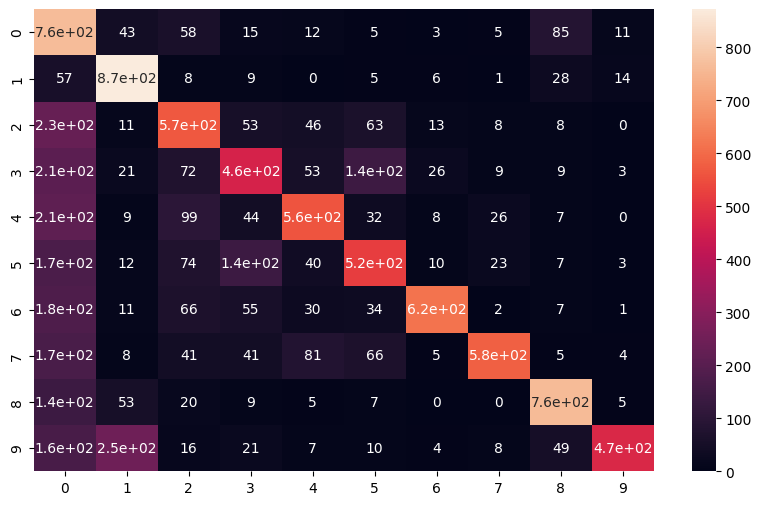

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred_multiclass),annot=True)

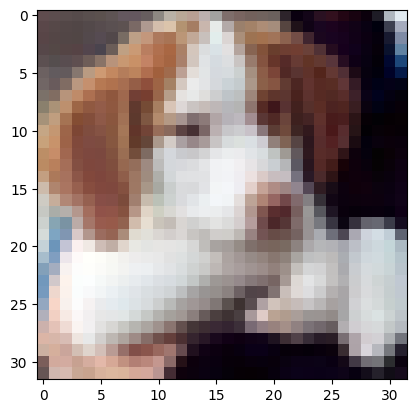

In [34]:
#Predict a single image
animal = x_test[16]
plt.imshow(animal)

In [35]:
y_pred = model.predict(animal.reshape(1,32,32,3))
predictions = np.round(y_pred).astype(int)

1/1 [==============================] - 0s 95ms/step


In [36]:
np.argmax(predictions, axis=1)

array([5], dtype=int64)